In [ ]:
import torch
from torch_geometric.utils import from_networkx
from torch_geometric.nn.models import Node2Vec
from sklearn.manifold import TSNE
import numpy as np

In [14]:
import igraph as ig
import networkx as nx
import matplotlib.pyplot as plt

In [7]:
g2 = ig.Graph.Read_GML("himalaisci.gml")
components = g2.components()
glownaskladowa = components.subgraphs()[0]
himal = glownaskladowa.subgraph(glownaskladowa.vs[:2000])
himalnx = himal.to_networkx()
data = from_networkx(himalnx)

In [8]:
model = Node2Vec(
    edge_index=data.edge_index,
    embedding_dim=64,
    walk_length=10,
    context_size=5,
    walks_per_node=20,
    num_negative_samples=1,
    sparse=True
)

In [9]:
loader = model.loader(batch_size=128, shuffle=True)
optimizer = torch.optim.SparseAdam(model.parameters(), lr=0.01)

def train():
    model.train()
    total_loss = 0
    for pos_rw, neg_rw in loader:
        optimizer.zero_grad()
        loss = model.loss(pos_rw, neg_rw)

        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    return total_loss / len(loader)

for epoch in range(1, 51):
    loss = train()
    print(f"Epoch {epoch:02d}, Loss: {loss:.4f}")

Epoch 01, Loss: 4.4075
Epoch 02, Loss: 3.4567
Epoch 03, Loss: 2.8946
Epoch 04, Loss: 2.5134
Epoch 05, Loss: 2.2172
Epoch 06, Loss: 1.9766
Epoch 07, Loss: 1.7796
Epoch 08, Loss: 1.6110
Epoch 09, Loss: 1.4709
Epoch 10, Loss: 1.3509
Epoch 11, Loss: 1.2527
Epoch 12, Loss: 1.1712
Epoch 13, Loss: 1.1036
Epoch 14, Loss: 1.0486
Epoch 15, Loss: 1.0039
Epoch 16, Loss: 0.9700
Epoch 17, Loss: 0.9433
Epoch 18, Loss: 0.9220
Epoch 19, Loss: 0.9014
Epoch 20, Loss: 0.8866
Epoch 21, Loss: 0.8760
Epoch 22, Loss: 0.8669
Epoch 23, Loss: 0.8565
Epoch 24, Loss: 0.8484
Epoch 25, Loss: 0.8434
Epoch 26, Loss: 0.8363
Epoch 27, Loss: 0.8308
Epoch 28, Loss: 0.8258
Epoch 29, Loss: 0.8219
Epoch 30, Loss: 0.8189
Epoch 31, Loss: 0.8154
Epoch 32, Loss: 0.8107
Epoch 33, Loss: 0.8073
Epoch 34, Loss: 0.8046
Epoch 35, Loss: 0.8013
Epoch 36, Loss: 0.7991
Epoch 37, Loss: 0.7970
Epoch 38, Loss: 0.7947
Epoch 39, Loss: 0.7928
Epoch 40, Loss: 0.7916
Epoch 41, Loss: 0.7888
Epoch 42, Loss: 0.7883
Epoch 43, Loss: 0.7863
Epoch 44, L

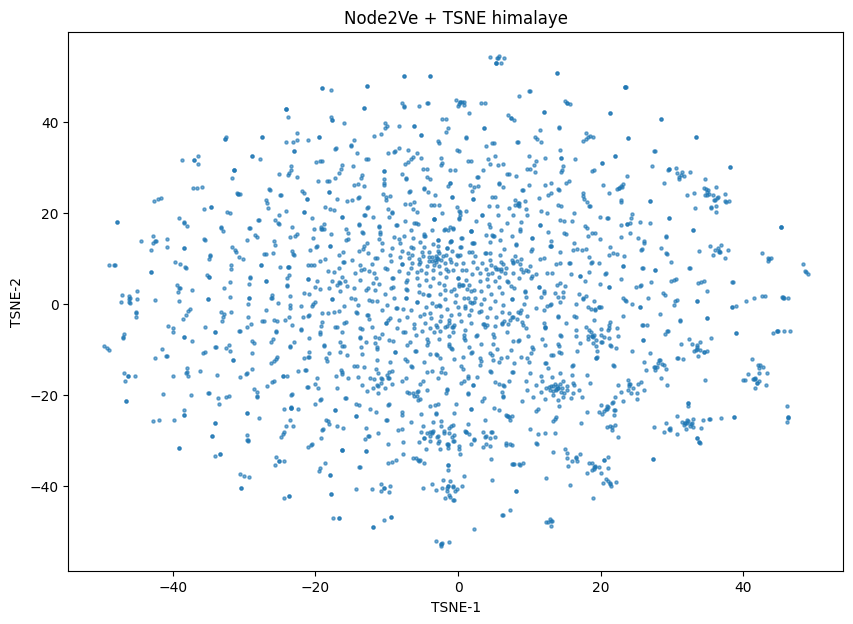

In [16]:
model.eval()
embeddings = model.embedding.weight.cpu().detach().numpy()

z_2d = TSNE(n_components=2, random_state=42).fit_transform(embeddings)

plt.figure(figsize=(10, 7))
plt.scatter(z_2d[:, 0], z_2d[:, 1], s=5, alpha=0.6)
plt.title("Node2Ve + TSNE himalaye")
plt.xlabel("TSNE-1")
plt.ylabel("TSNE-2")
plt.show()

In [18]:
pos_spring = nx.spring_layout(himalnx)
pos_circular = nx.circular_layout(himalnx)
for k in pos_circular:
    pos_circular[k] = pos_circular[k] * 3
pos_kawada = nx.kamada_kawai_layout(himalnx, scale=10)

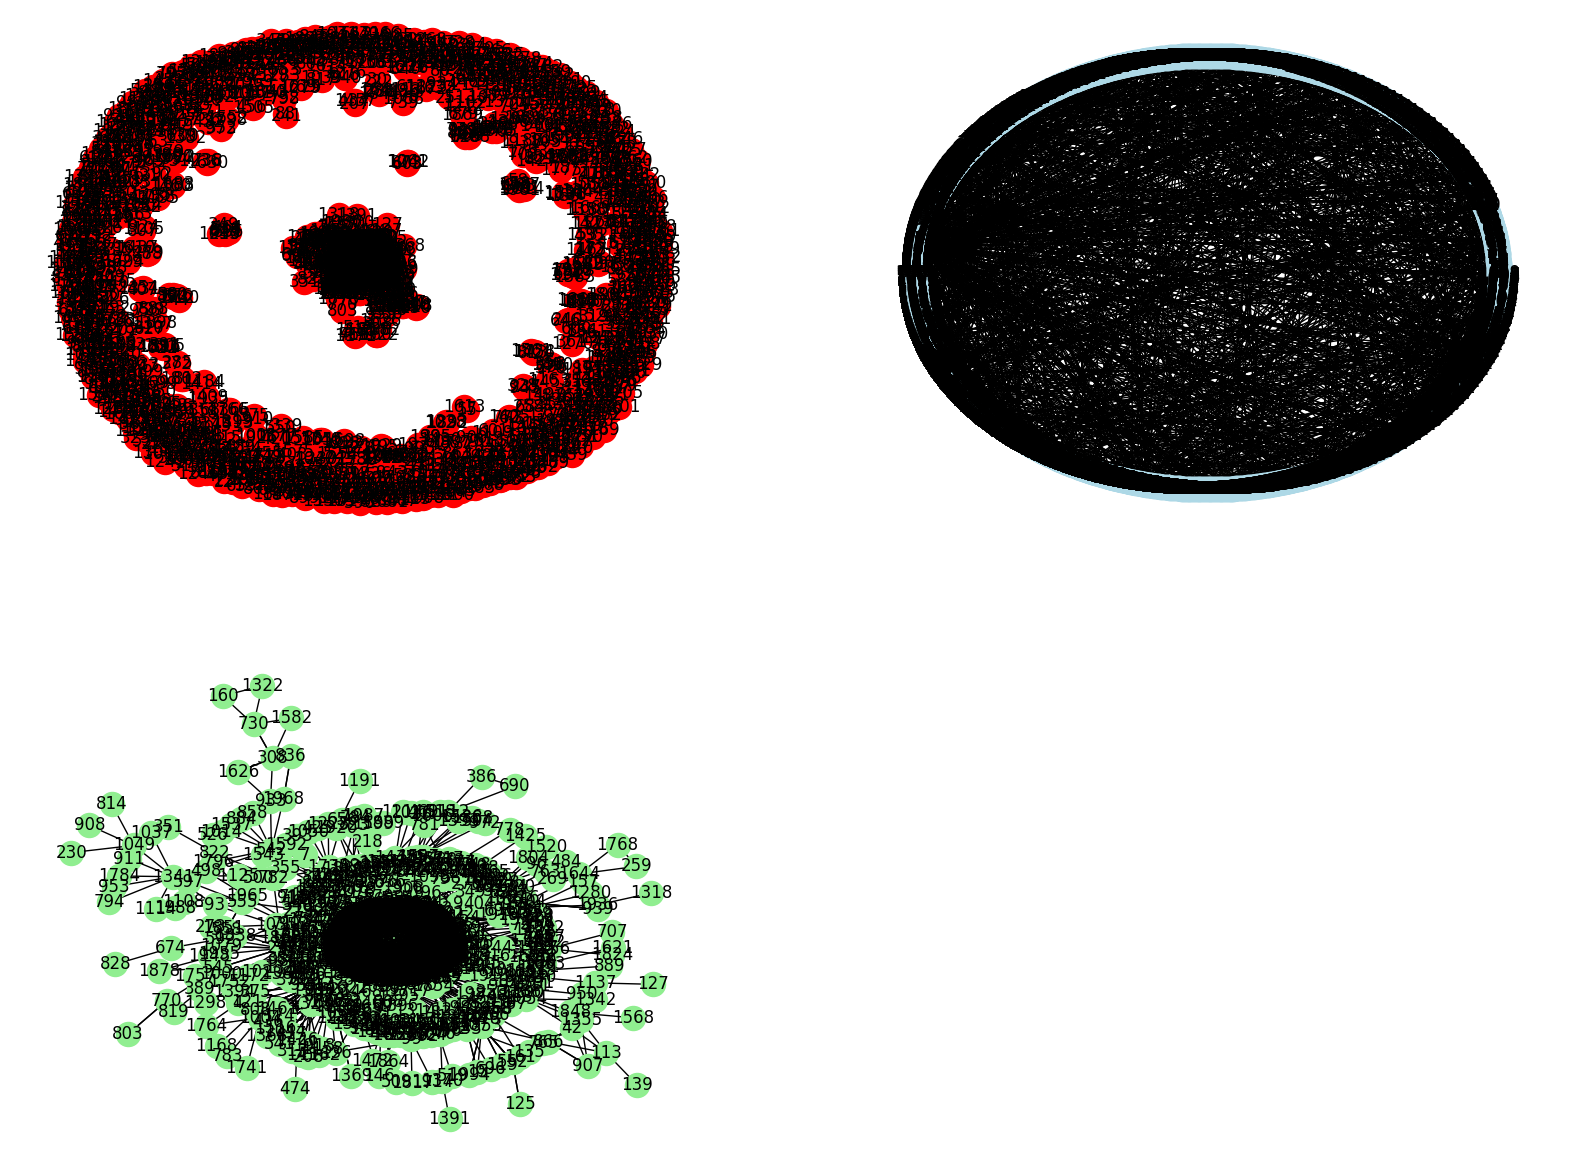

In [19]:
plt.figure(figsize=(20,15))
plt.subplot(2,2,1)
nx.draw(himalnx, pos = pos_spring,with_labels=True, node_color = 'red')

plt.subplot(2,2,2)
nx.draw(himalnx, pos = pos_circular, with_labels=True, node_color = 'lightblue')

plt.subplot(2,2,3)
nx.draw(himalnx, pos = pos_kawada, with_labels=True, node_color = 'lightgreen')
plt.show()

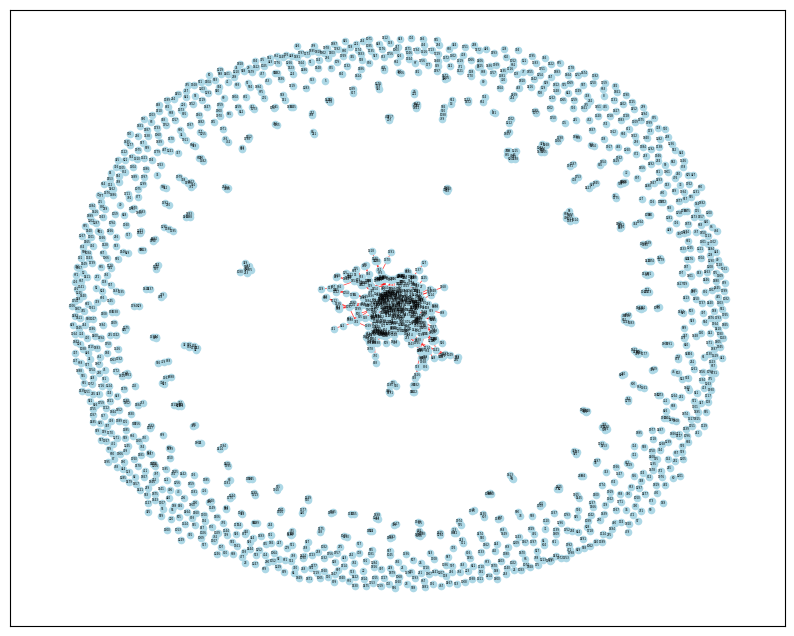

In [28]:
plt.figure(figsize=(10, 8))
nx.draw_networkx_nodes(himalnx, pos_spring, node_size=20, node_color="lightblue")
nx.draw_networkx_edges(himalnx, pos_spring, edge_color="red", alpha=0.8, width=0.5)
nx.draw_networkx_labels(himalnx, pos_spring, font_size=2)
plt.show()

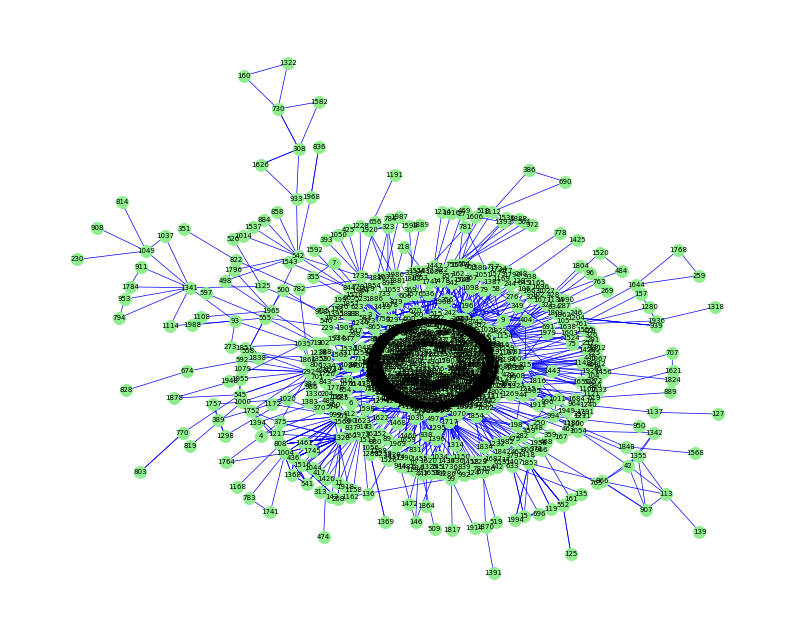

In [44]:
plt.figure(figsize=(10, 8))
nx.draw_networkx_nodes(himalnx, pos_kawada, node_size=70, node_color="lightgreen")
nx.draw_networkx_edges(himalnx, pos_kawada, alpha=1, edge_color="blue", width=0.5)
nx.draw_networkx_labels(himalnx, pos_kawada, font_size=5)

plt.gca().set_facecolor("black")
plt.axis("off")
plt.show()

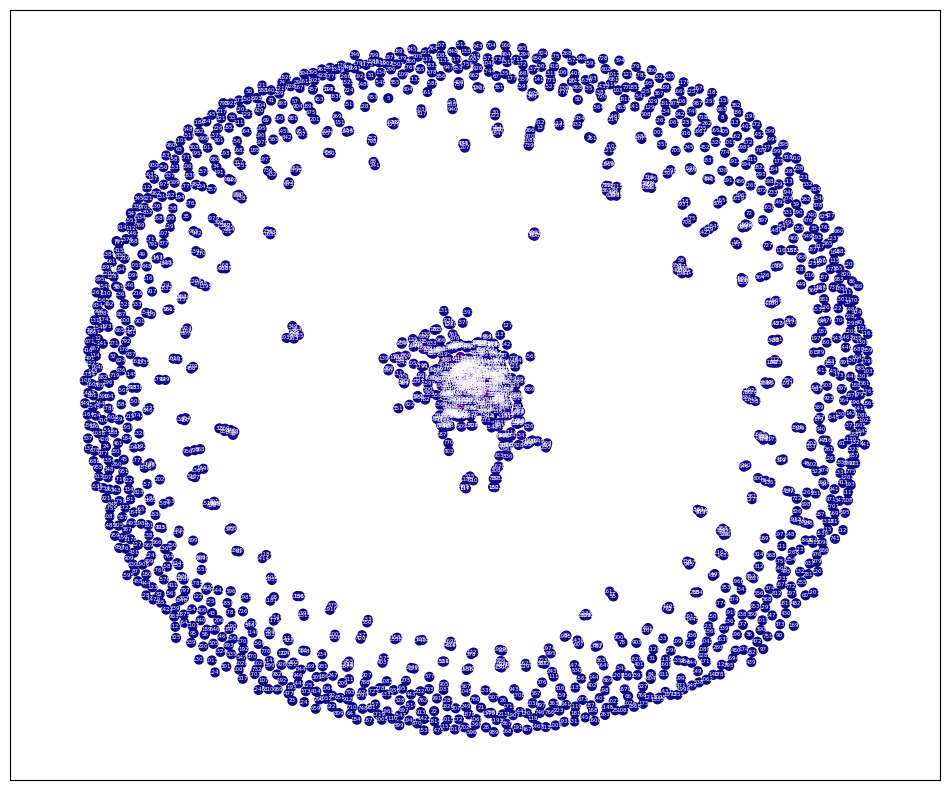

In [48]:
node_degrees = dict(himalnx.degree())
node_colors = [node_degrees[n] for n in himalnx.nodes()]

plt.figure(figsize=(12, 10))
nodes = nx.draw_networkx_nodes(
    himalnx, pos_spring,
    node_color=node_colors,
    cmap=plt.cm.plasma,
    node_size=40
)

nx.draw_networkx_edges(himalnx, pos_spring, alpha=0.05, edge_color="white", width=0.3)
nx.draw_networkx_labels(himalnx, pos_spring, font_size=4, font_color="white")
plt.show()

{0: Text(1.274214347060854, -3.2369175229411162, '0'),
 1: Text(1.4419202415754413, -0.09549952828689857, '1'),
 2: Text(0.03436519402303973, -0.23551138562524457, '2'),
 3: Text(-1.5197678549538713, 1.6390813213699111, '3'),
 4: Text(-4.14399283716319, -2.389616735547975, '4'),
 5: Text(1.3967985466057105, 0.02407963494409186, '5'),
 6: Text(-1.9656283194281514, -1.2996086903159503, '6'),
 7: Text(-2.3726088684532485, 3.3704972609580537, '7'),
 8: Text(1.3965293831578935, 0.03717392769744194, '8'),
 9: Text(1.7052516451496957, 1.463513067761403, '9'),
 10: Text(-0.4665886258093815, -3.2826990667082008, '10'),
 11: Text(-2.266385523616321, -3.9731710423545072, '11'),
 12: Text(1.3959817362184757, 0.05457516019262104, '12'),
 13: Text(0.9915535214064685, 0.3252272234862135, '13'),
 14: Text(1.7721080565748042, -3.2085423541557043, '14'),
 15: Text(2.225718876003895, -5.070007493070299, '15'),
 16: Text(3.820115375468142, -1.2221115596592347, '16'),
 17: Text(1.763568380515345, -0.631369

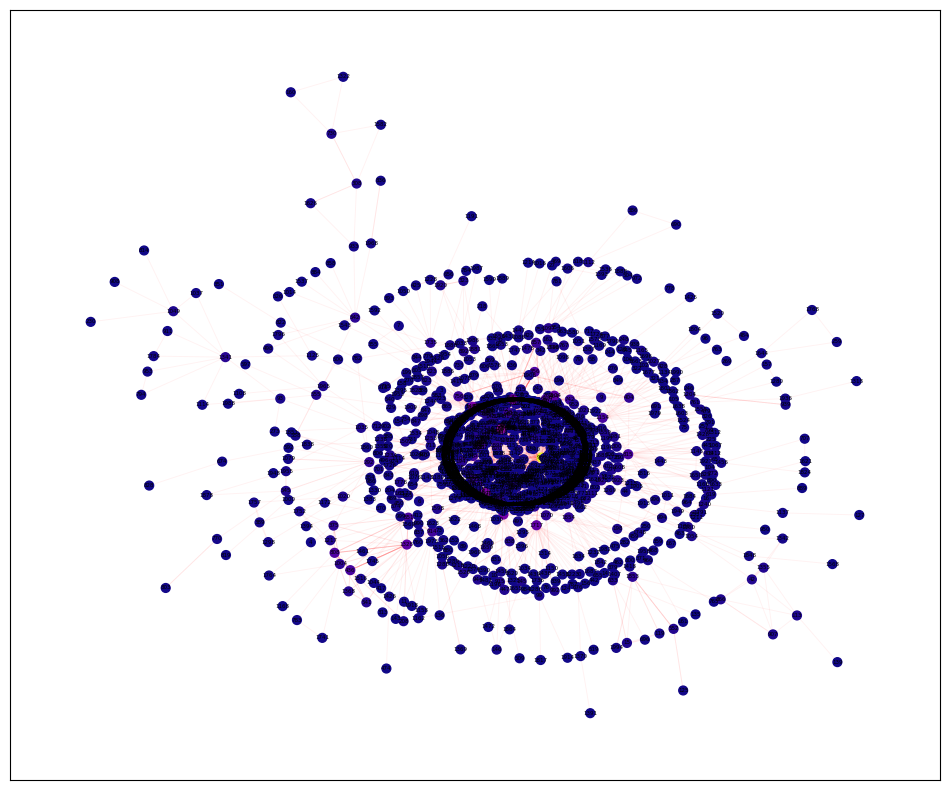

In [50]:
plt.figure(figsize=(12, 10))
nodes = nx.draw_networkx_nodes(
    himalnx, pos_kawada,
    node_color=node_colors,
    cmap=plt.cm.plasma,
    node_size=40
)
nx.draw_networkx_edges(himalnx, pos_kawada, alpha=0.05, edge_color="red", width=0.7)
nx.draw_networkx_labels(himalnx, pos_kawada, font_size=4)

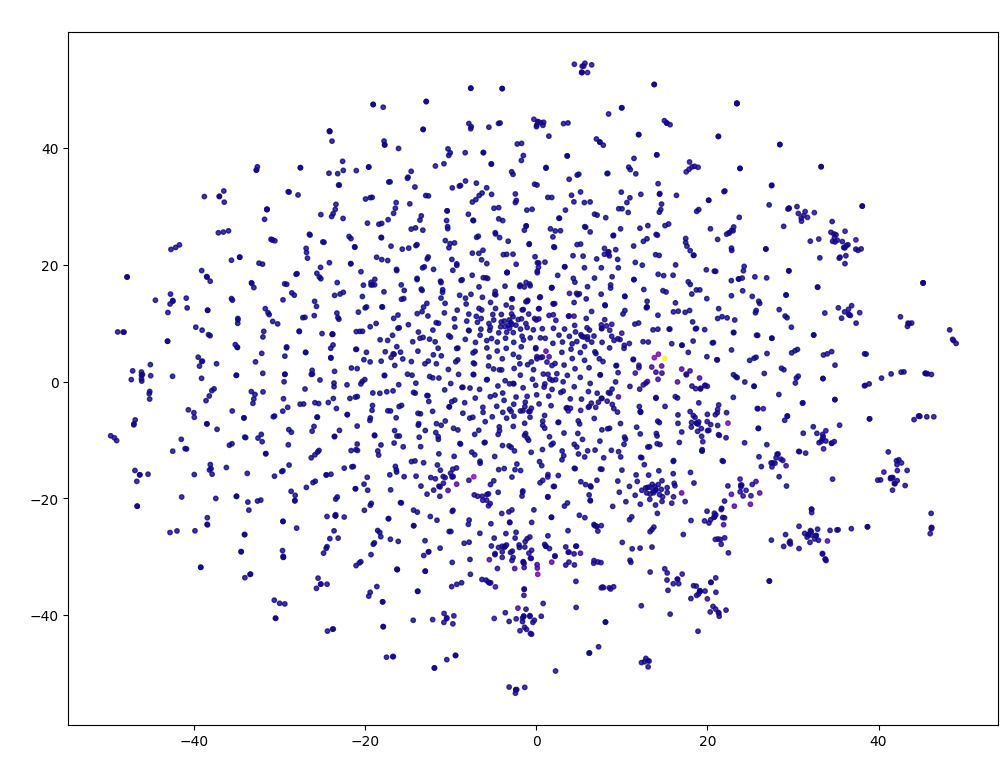

In [59]:
plt.figure(figsize=(12, 9))
node_colors1 = np.array([himalnx.degree(n) for n in himalnx.nodes()])
node_colors1 = node_colors[0:1997]
scatter = plt.scatter(z_2d[:, 0], z_2d[:, 1],
                      c=node_colors1,
                      cmap="plasma",
                      s=10,
                      alpha=0.8)

plt.title("Node2Vec + t-SNE (kolor: degree)", color="white")
plt.xlabel("TSNE-1", color="white")
plt.ylabel("TSNE-2", color="white")
plt.show()